In [1]:
import os
import cv2
from time import time
import numpy as np
from sklearn.utils import shuffle

from matplotlib import pyplot as plt
plt.rcParams['figure.figsize'] = [15, 6]
path = 'D:/Projects/data/subset_homework'

In [2]:
def show_pictures(path:str, class_id:int):
    fnames = os.listdir(os.path.join(path, f'class_id_{class_id}'))
    images = [cv2.imread(os.path.join(path, f'class_id_{class_id}', f), cv2.IMREAD_UNCHANGED) for f in fnames]
    labels = [0] * len(images)

    for cnt, idx in enumerate(np.random.randint(0, len(images), 10)):
        plt.subplot(2,5,cnt+1)
        plt.imshow(images[idx], cmap='gray', vmin=0, vmax=255)
        plt.title(labels[idx]), plt.axis(False)
    return images, labels

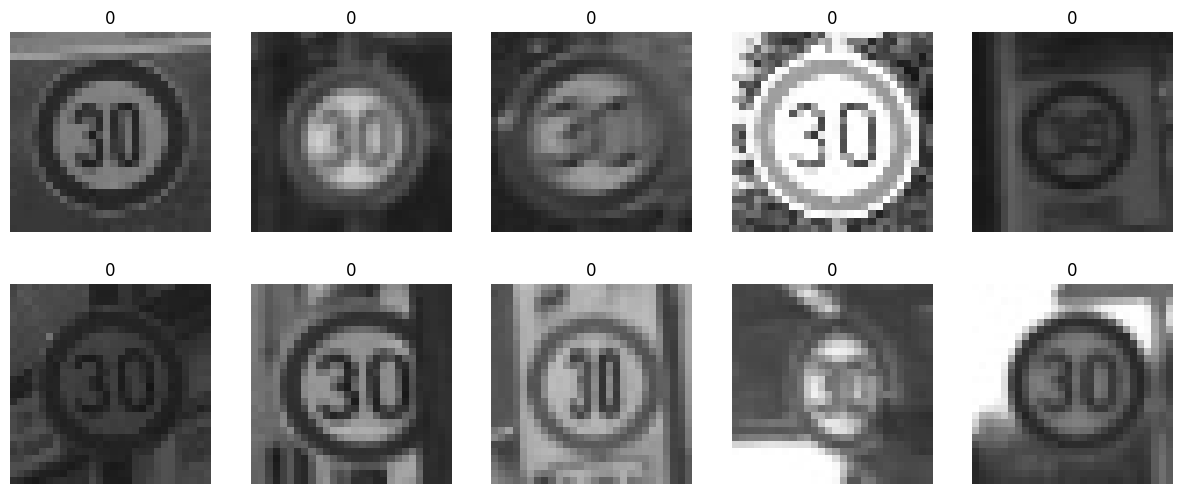

In [3]:
images_0, labels_0 = show_pictures(path, 0)

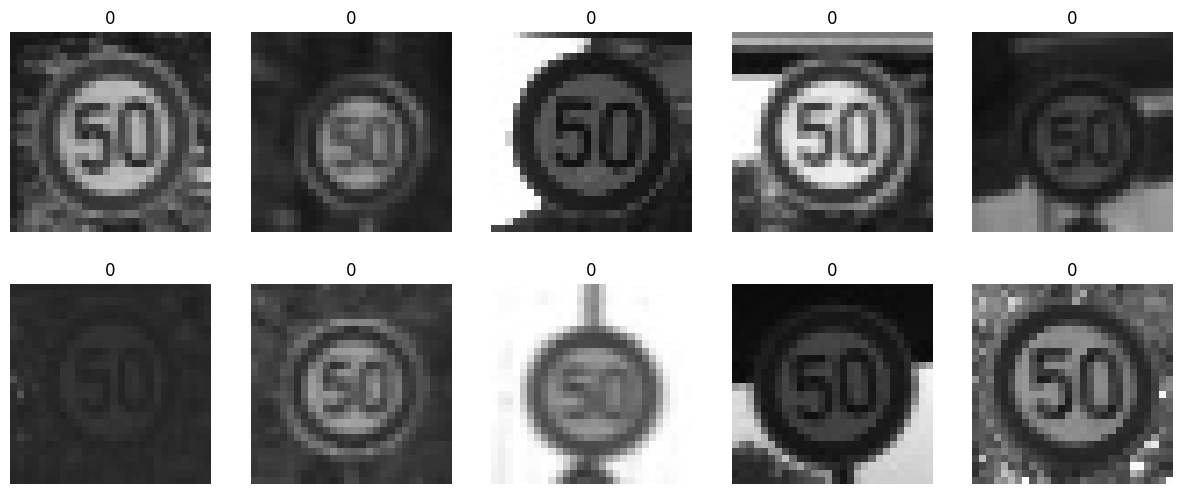

In [4]:
images_1, labels_1 = show_pictures(path, 1)

In [5]:
print('Num samples class_0', len(images_0))
print('Num samples class_1', len(images_1))

Num samples class_0 2220
Num samples class_1 2250


In [6]:
images = images_0 + images_1
labels = labels_0 + labels_1
images, labels = shuffle(images, labels)

images = np.array(images)
labels = np.array(labels)

print('Images', images.shape)
print('Labels', labels.shape)

Images (4470, 28, 28)
Labels (4470,)


In [7]:
start = time()
pixels = np.array([image.flatten() for image in images])/255
stop = time()

print('Shape', pixels.shape)
print('Elapsed time', stop - start)

Shape (4470, 784)
Elapsed time 0.05721879005432129


In [8]:
import tensorflow as tf
from tensorflow.keras import Model
from tensorflow.keras.layers import Dense, Input
from tensorflow.keras.optimizers import Adam

In [9]:
input_shape = (pixels.shape[1],)
inputs = Input(shape=input_shape)
x = Dense(1, activation="linear")(inputs)
outputs = Dense(1, activation="linear")(x)
model = Model(inputs=inputs, outputs=outputs)

model.compile(optimizer="adam", loss="mean_squared_error")
history = model.fit(pixels, labels, epochs=50, batch_size=32, validation_split=0.2)
model.summary()

Epoch 1/50
112/112 ━━━━━━━━━━━━━━━━━━━━ 5s 11ms/step - loss: 0.0065 - val_loss: 0.0016
Epoch 2/50
112/112 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.0014 - val_loss: 8.6291e-04
Epoch 3/50
112/112 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 6.8242e-04 - val_loss: 6.8387e-04
Epoch 4/50
112/112 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 4.7374e-04 - val_loss: 4.9656e-04
Epoch 5/50
112/112 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 3.2189e-04 - val_loss: 2.5337e-04
Epoch 6/50
112/112 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 2.2789e-04 - val_loss: 2.0696e-04
Epoch 7/50
112/112 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 1.6951e-04 - val_loss: 1.3937e-04
Epoch 8/50
112/112 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 1.1791e-04 - val_loss: 1.0509e-04
Epoch 9/50
112/112 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 9.7496e-05 - val_loss: 8.6275e-05
Epoch 10/50
112/112 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 7.3969e-05 - val_loss: 5.8095e-05
Epoch 11/50
112/112 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 4.8882e-0

Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)        │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 1)              │           785 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1)              │             2 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 2,363 (9.23 KB)

 Trainable params: 787 (3.07 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 1,576 (6.16 KB)

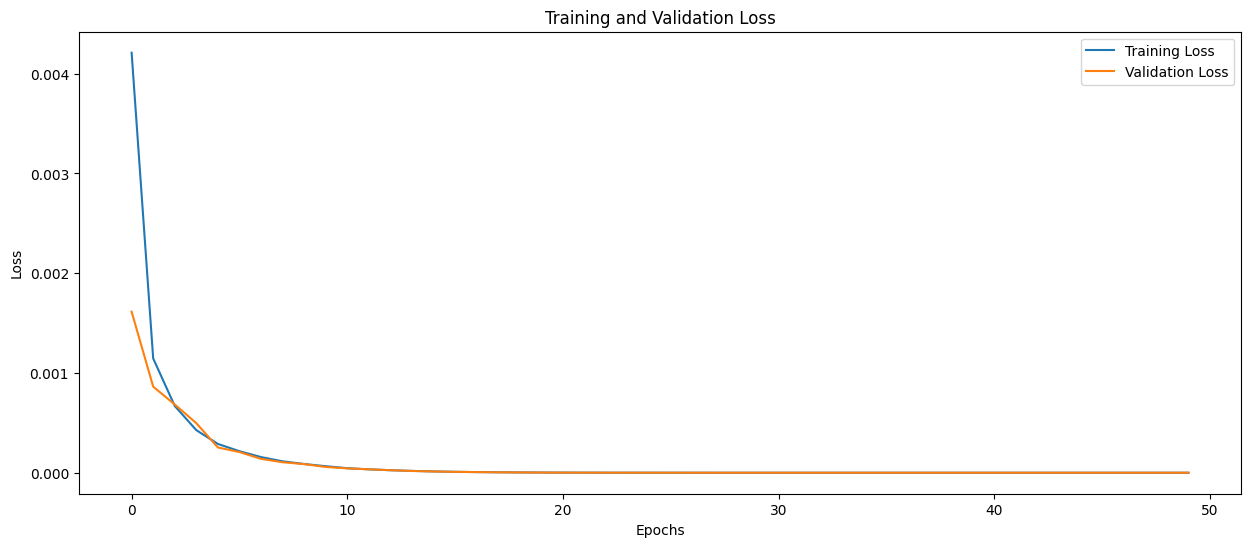

In [10]:
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [13]:
inputs = Input(shape=input_shape)
x = Dense(64, activation="relu")(inputs)
x = Dense(32, activation="relu")(x)
outputs = Dense(1, activation="linear")(x)
model = Model(inputs=inputs, outputs=outputs)

model.compile(optimizer="adam", loss="mean_squared_error")
history = model.fit(pixels, labels, epochs=100, batch_size=32, validation_split=0.2)
model.summary()

Epoch 1/100
112/112 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - loss: 0.0751 - val_loss: 0.0013
Epoch 2/100
112/112 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0012 - val_loss: 8.2844e-04
Epoch 3/100
112/112 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 7.6727e-04 - val_loss: 5.9981e-04
Epoch 4/100
112/112 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 5.4017e-04 - val_loss: 5.2540e-04
Epoch 5/100
112/112 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 4.8051e-04 - val_loss: 3.9034e-04
Epoch 6/100
112/112 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 4.0942e-04 - val_loss: 3.4064e-04
Epoch 7/100
112/112 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 3.2316e-04 - val_loss: 2.5369e-04
Epoch 8/100
112/112 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 2.3579e-04 - val_loss: 8.7259e-04
Epoch 9/100
112/112 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 3.6416e-04 - val_loss: 2.4937e-04
Epoch 10/100
112/112 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 1.5406e-04 - val_loss: 2.2880e-04
Epoch 11/100
112/112 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss:

Model: "functional_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_2 (InputLayer)      │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 64)             │        50,240 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 157,061 (613.52 KB)

 Trainable params: 52,353 (204.50 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 104,708 (409.02 KB)

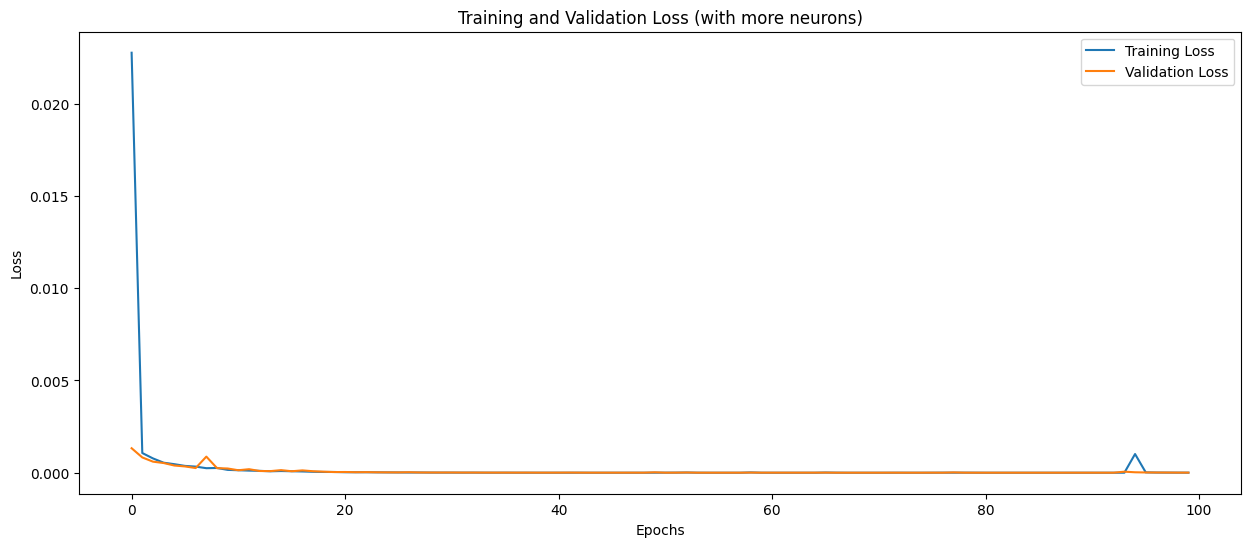

In [14]:
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss (with more neurons)')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

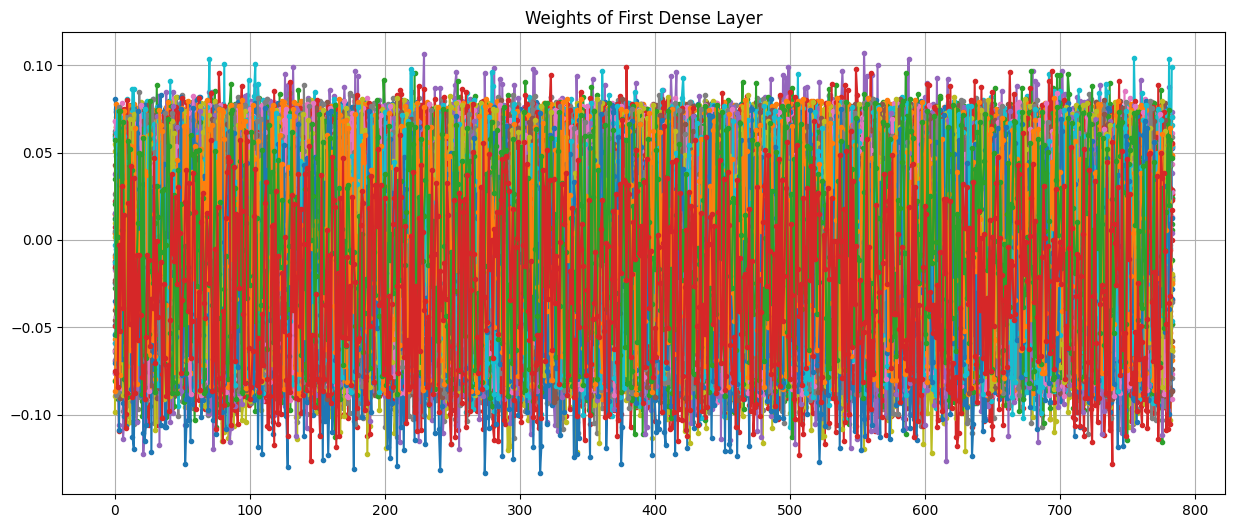

In [19]:
plt.plot(model.layers[1].weights[0].numpy(), '.-')
plt.title('Weights of First Dense Layer')
plt.grid(True)
plt.show()

140/140 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
Accuracy: 1.0


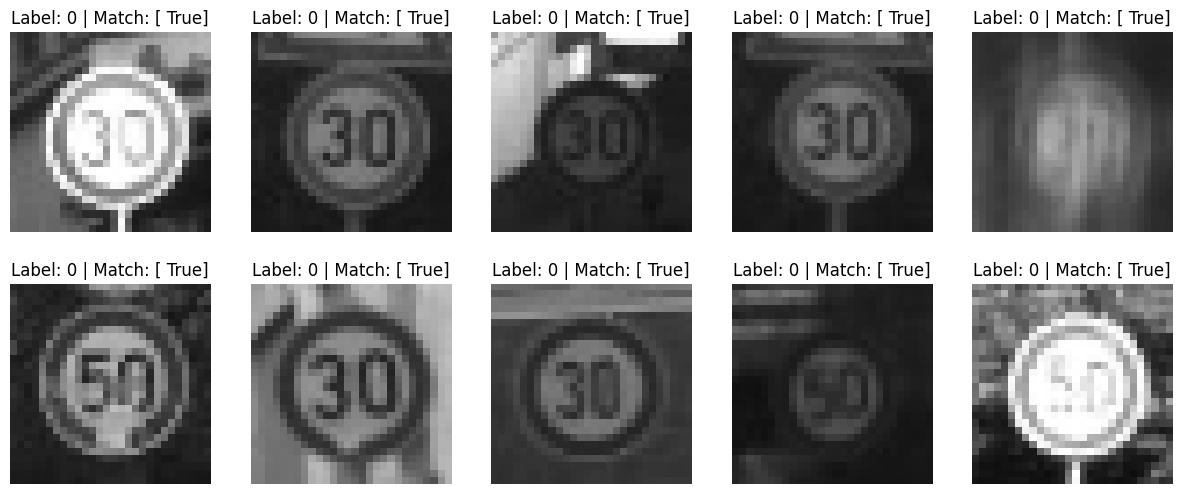

In [ ]:
predictions = model.predict(pixels)

correct = 0
for prediction, label in zip(predictions, labels):
    if np.round(prediction) == label:
        correct += 1

accuracy = correct / len(labels)
print('Accuracy:', accuracy)

pixels_rescaled = pixels * 255

for cnt, idx in enumerate(np.random.randint(0, len(pixels), 10)):
    plt.subplot(2, 5, cnt + 1)
    plt.imshow(pixels_rescaled[idx].reshape(28, 28), cmap='gray', vmin=0, vmax=255)
    prediction = np.round(predictions[idx])
    plt.title(f'Label: {labels[idx]} | Match: {prediction == labels[idx]}')
    plt.axis(False)
plt.show()